In [4]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
     

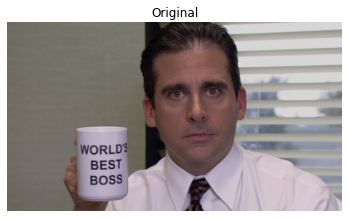

(900, 1600, 3)

In [5]:
url =  "https://media-cdn.t24.com.tr/media/library/2022/05/1654000049942-yeni-proje-5.jpg"
image = io.imread(url) 

plt.figure()
plt.imshow(image)
plt.axis('off'),plt.title('Original')
plt.show()
image.shape

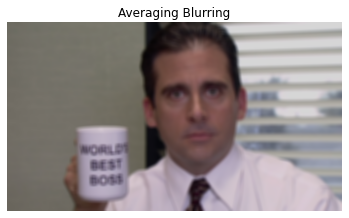

In [17]:
#Averaging

dst2 = cv.blur(image , ksize = (20,20))
plt.figure()
plt.axis('off'),plt.title('Averaging Blurring')
plt.imshow(dst2)

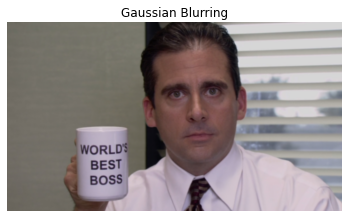

In [23]:
#Gaussian
gb = cv.GaussianBlur(image, ksize = (5,5) , sigmaX = 7)
plt.figure()
plt.axis('off'),plt.title('Gaussian Blurring')
plt.imshow(gb)


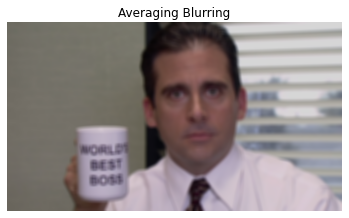

In [21]:
#Median
mb = cv.medianBlur(image, ksize = 3)
plt.figure()
plt.axis('off'),plt.title('Averaging Blurring')
plt.imshow(dst2)

 Gauss Noise is a term from signal processing theory denoting a kind of signal noise that has a probability density function (pdf) equal to that of the normal distribution (which is also known as the Gaussian distribution).

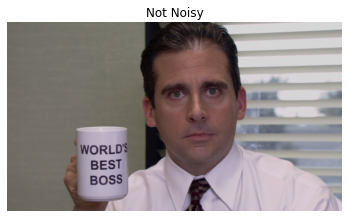

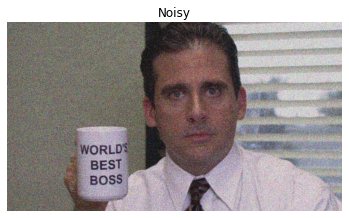

In [25]:
def gaussianNoise(image):
  row,col,ch = image.shape
  mean = 0
  var = 0.05
  std = var**0.5
  
  gauss = np.random.normal(mean,std,(row,col,ch))
  gauss.reshape(row,col,ch)
  noisy = image + gauss
  return noisy

#normalization

url =  "https://media-cdn.t24.com.tr/media/library/2022/05/1654000049942-yeni-proje-5.jpg"
image = io.imread(url) /255

plt.figure()
plt.axis('off'),plt.title('Not Noisy')
plt.imshow(image)

gaussianNoisyImage = gaussianNoise(image)
plt.figure()
plt.axis('off'),plt.title('Noisy')
plt.imshow(gaussianNoisyImage)




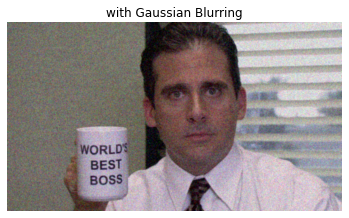

In [27]:
#Gauss Blur
gb2 = cv.GaussianBlur(gaussianNoisyImage, ksize = (5,5) , sigmaX = 7)
plt.figure()
plt.axis('off'),plt.title('with Gaussian Blurring')
plt.imshow(gb2)

<ipython-input-20-64d96d3a3bfc>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noisy[coords] = 1
<ipython-input-20-64d96d3a3bfc>:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noisy[coords] = 0


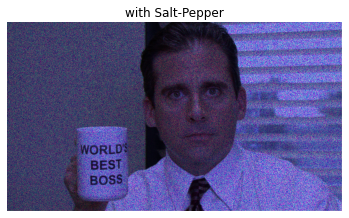

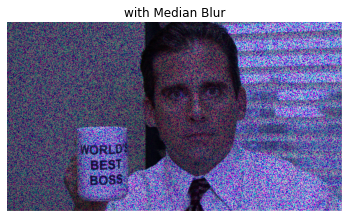

In [20]:
#Salt-Pepper Noise
def saltPepperNoise(image):
  row,col,ch = image.shape
  s_vs_p = 0.5
  amount = 0.4
  noisy = np.copy(image)

  num_salt = np.ceil(amount * image.size * s_vs_p) 
  coords = [np.random.randint(0,i-1,int(num_salt)) for i in image.shape]
  noisy[coords] = 1

  num_pepper = np.ceil(amount * image.size * (1 - s_vs_p)) 
  coords = [np.random.randint(0,i-1,int(num_pepper)) for i in image.shape]
  noisy[coords] = 0
  return noisy
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
spImage = saltPepperNoise(image)
plt.figure()
plt.axis('off'),plt.title('with Salt-Pepper')
plt.imshow(spImage)

mb2 = cv.medianBlur(spImage , ksize = 3)
plt.figure()
plt.axis('off'),plt.title('with Median Blur')
plt.imshow(mb2)

